# Bayesian Knowledge Tracing Example

Bayesian Knowledge Tracing (BKT) is a probabilistic model used in educational data mining (EDM).  The BKT model is a Hidden Markov Model that estimates learners' knowledge over time.  Data is gathered from learners interacting with a system, included whether they get a problem correct or not.  BKT empowers teachers to identify struggling students, design personalized interventions, and improve learning outcomes.

In this example, we implement Bayesian Knowledge Tracing with the [pyBKT Python library](https://pypi.org/project/pyBKT/). This library is described in this [paper by Bulut et al](https://www.mdpi.com/2624-8611/5/3/50/htm).

Sections of this project:
- [Load Libraries](#load_libraries)
- [Load Data](#load_data)
- [Explore Data](#explore_data)
- [Build Models](#build_models)
- [Model Prediction](#model_prediction)
- [Model Performance](#model_performance)
- [Conclusion and Comments](#conclusion)


<a id="load_libraries"></a>
## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyBKT.models import Model

<a id="load_data"></a>
## Load Data

We load the sample [Cognitive Tutor data](https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv),
though this data could be replaced by other data with similar format.  [Cognituve Tutor](https://nces.ed.gov/pubsearch//pubsinfo.asp?pubid=WWCIRMA88) is an interactive software program teaching Algebra and Geometry. 
This data contains:
- Student Information
- Problem Information
- Interaction Data between the student and the system

In [2]:
ct_df = pd.read_csv('ct.csv')

<a id="explore_data"></a>
## Explore Data

We explore some aspects of the data
- the features and their data types
- the first few rows of data

In [3]:
# Info on the column types and missing data
ct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16857 non-null  int64  
 1   Row                          16857 non-null  int64  
 2   Anon Student Id              16857 non-null  object 
 3   Problem Hierarchy            16857 non-null  object 
 4   Problem Name                 16857 non-null  object 
 5   Problem View                 16857 non-null  int64  
 6   Step Name                    16857 non-null  object 
 7   Step Start Time              16851 non-null  object 
 8   First Transaction Time       16857 non-null  object 
 9   Correct Transaction Time     16711 non-null  object 
 10  Step End Time                16857 non-null  object 
 11  Step Duration (sec)          16851 non-null  float64
 12  Correct Step Duration (sec)  10437 non-null  float64
 13  Error Step Durat

In [4]:
# First five lines of the Cognitive Tutor dataset
ct_df.head(5)

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5


<a id="build_models"></a>
## Build Models

Divide the data into training and test sets.  Then, build two models: one base model and one model with forgetting (allows for the learner forgetting a skill that they used to have).  To simplify the output, we only look at the skills related to fractions.  These skills are listed below.

In [5]:
train_df, test_df = train_test_split(ct_df, test_size=0.2)

In [6]:
# Initialize Model without forgetting
bkt_model = Model(seed=1, num_fits=1)

# Initialize Model with forgetting
bkt_modelwforget = Model(seed=1, num_fits=1)

In [7]:
# Train models on all skills containing 'fraction'
bkt_model.fit(data = train_df, skills = ".*fraction.*")
bkt_modelwforget.fit(data = train_df, skills = ".*fraction.*", forgets=True)

In [8]:
print("All skills related to fractions:\n\t%s" % '\n\t'.join(bkt_model.coef_.keys()))

All skills related to fractions:
	Plot non-terminating improper fraction
	Plot terminating proper fraction
	Calculate part in proportion with fractions
	Calculate total in proportion with fractions


<a id="model_prediction"></a>
## Model Prediction

Comparing the predicted parameters between the models shows that the models give different results, which we would expect.  Allowing the model to consider forgetting makes it more accurate.  We display the data in three different ways.
- a dataframe that allows for easy comparison of values
- a dataframe shows all the data in a smaller space
- line graphs of the values

In [9]:
# Print estimated model parameters
orig_params_df = pd.concat([bkt_model.params(), bkt_modelwforget.params()],axis=1)
orig_params_df.columns = ['Base Model', 'Forgetting Model']
orig_params_df

Base Model  \
skill                                        param   class                 
Plot non-terminating improper fraction       prior   default     0.43866   
                                             learns  default     0.15417   
                                             guesses default     0.26931   
                                             slips   default     0.16800   
                                             forgets default     0.00000   
Plot terminating proper fraction             prior   default     0.74395   
                                             learns  default     0.16470   
                                             guesses default     0.18911   
                                             slips   default     0.37873   
                                             forgets default     0.00000   
Calculate part in proportion with fractions  prior   default     0.45481   
                                             learns  default     0.16502   
                                             guesses default     0.44625   
                                             slips   default     0.11116   
                                             forgets default     0.00000   
Calculate total in proportion with fractions prior   default     0.45416   
                                             learns  default     0.25744   
                                             guesses default     0.35730   
                                             slips   default     0.12233   
                                             forgets default     0.00000   

                                                              Forgetting Model  
skill                                        param   class                      
Plot non-terminating improper fraction       prior   default           0.44692  
                                             learns  default           0.16004  
                                             guesses default           0.26564  
                                             slips   default           0.15358  
                                             forgets default           0.05409  
Plot terminating proper fraction             prior   default           0.67637  
                                             learns  default           0.14599  
                                             guesses default           0.25063  
                                             slips   default           0.31555  
                                             forgets default           0.08832  
Calculate part in proportion with fractions  prior   default           0.26489  
                                             learns  default           0.18122  
                                             guesses default           0.52980  
                                             slips   default           0.00875  
                                             forgets default           0.12408  
Calculate total in proportion with fractions prior   default           0.37756  
                                             learns  default           0.24314  
                                             guesses default           0.40430  
                                             slips   default           0.10165  
                                             forgets default           0.00319

In [10]:
orig_params_df.unstack().unstack()

Base Model                  \
class                                           default                   
param                                           forgets guesses  learns   
skill                                                                     
Calculate part in proportion with fractions     0.00000 0.44625 0.16502   
Calculate total in proportion with fractions    0.00000 0.35730 0.25744   
Plot non-terminating improper fraction          0.00000 0.26931 0.15417   
Plot terminating proper fraction                0.00000 0.18911 0.16470   

                                                             Forgetting Model  \
class                                                                 default   
param                                          prior   slips          forgets   
skill                                                                           
Calculate part in proportion with fractions  0.45481 0.11116          0.12408   
Calculate total in proportion with fractions 0.45416 0.12233          0.00319   
Plot non-terminating improper fraction       0.43866 0.16800          0.05409   
Plot terminating proper fraction             0.74395 0.37873          0.08832   

                                                                              
class                                                                         
param                                        guesses  learns   prior   slips  
skill                                                                         
Calculate part in proportion with fractions  0.52980 0.18122 0.26489 0.00875  
Calculate total in proportion with fractions 0.40430 0.24314 0.37756 0.10165  
Plot non-terminating improper fraction       0.26564 0.16004 0.44692 0.15358  
Plot terminating proper fraction             0.25063 0.14599 0.67637 0.31555

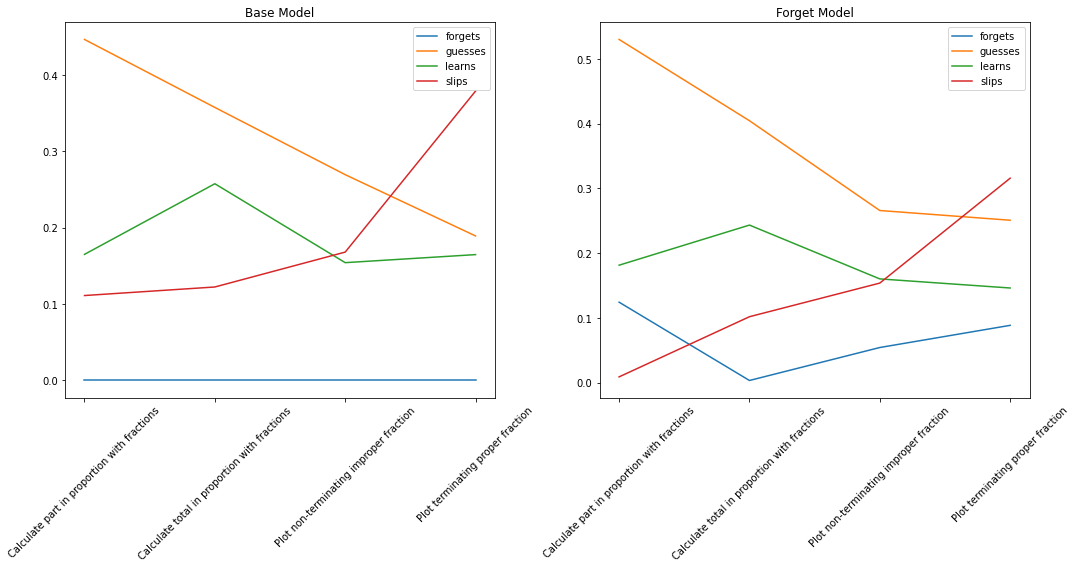

In [11]:
# Display the values in graphs

orig_cols = list(orig_params_df.columns)
params_df = orig_params_df.unstack().unstack()

# Extract 
parameters = ['forgets', 'guesses', 'learns', 'slips']

# Create two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex=True)

# First Plot position
plt.subplot(1,2,1)
# Create first plot
for param in parameters:
    plt.plot(params_df['Base Model']['default'][param], label=param)
# Label first plot
plt.title('Base Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout to prevent clipping of labels
plt.legend()

# Second Plot position
plt.subplot(1,2,2)
# Create second plot
for param in parameters:
    plt.plot(params_df['Forgetting Model']['default'][param], label=param)
# Label second plot
plt.title('Forget Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout to prevent clipping of labels
plt.legend()

# Display plot
plt.show()

<a id="model_performance"></a>
## Model Performance

We evaluate the two models on both the training and test sets.  We expect the models to perform better on the training sets, but a large difference between the training and test performance would indicate overfitting.  The default Root Mean Squared Error (RMSE) is used to compare performance.

In [12]:
# Evaluate the model 
training_rmse = bkt_model.evaluate(data = train_df)
training_rmsewforget = bkt_modelwforget.evaluate(data = train_df)
test_rmse = bkt_model.evaluate(data = test_df)
test_rmsewforget = bkt_modelwforget.evaluate(data = test_df)

In [13]:
# Display the results in a dataframe
results = pd.DataFrame({'Training Error':[training_rmse, training_rmsewforget],
                       'Test Error':[test_rmse, test_rmsewforget]},
                      index=['Base Model', 'Forgetting Model'])

results

,Training Error,Test Error
Base Model,0.44606,0.45360
Forgetting Model,0.44719,0.45451


<a id="conclusion"></a>
## Conclusions and Remarks
 
Bayesian Knowledge Tracing is a powerful modeling technique for understanding learning processes. By capturing student knowledge acquisition over time, BKT allows educators and educational software to individualize their education. This allows different students to move through the material at varying paces, keeping each student from getting bored or getting lost.

The above analysis is an example of applying Bayesian Knowledge Tracing.  The same code could be expanded with:
- data from different sources 
- data with a wider variety of states
- more skills rather than just the skills based on fractions.